In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset after PCA
df = pd.read_csv('/content/drive/MyDrive/Preprocessing_68/processed_with_pca.csv',parse_dates=['datetime'],index_col='datetime')

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2047840, 17)
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-17 17:24:00                3.358                  0.170   232.65   
2006-12-17 17:25:00                3.358                  0.164   231.20   
2006-12-17 17:26:00                3.358                  0.162   232.86   
2006-12-17 17:27:00                3.358                  0.164   232.89   
2006-12-17 17:28:00                3.282                  0.100   232.33   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-17 17:24:00              14.6             0.0             0.0   
2006-12-17 17:25:00              14.4             0.0             0.0   
2006-12-17 17:26:00              14.6             0.0             0.0   
2006-12-17 17:27:00              14.6             0.0             0.0   


In [3]:
import numpy as np

# Columns that gonna transform
log_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage']

for col in log_cols:
    new_col = col + '_log'
    df[new_col] = np.log1p(df[col])

print("Log transform applied. New columns added:", [c+'_log' for c in log_cols])


Log transform applied. New columns added: ['Global_active_power_log', 'Global_reactive_power_log', 'Voltage_log']


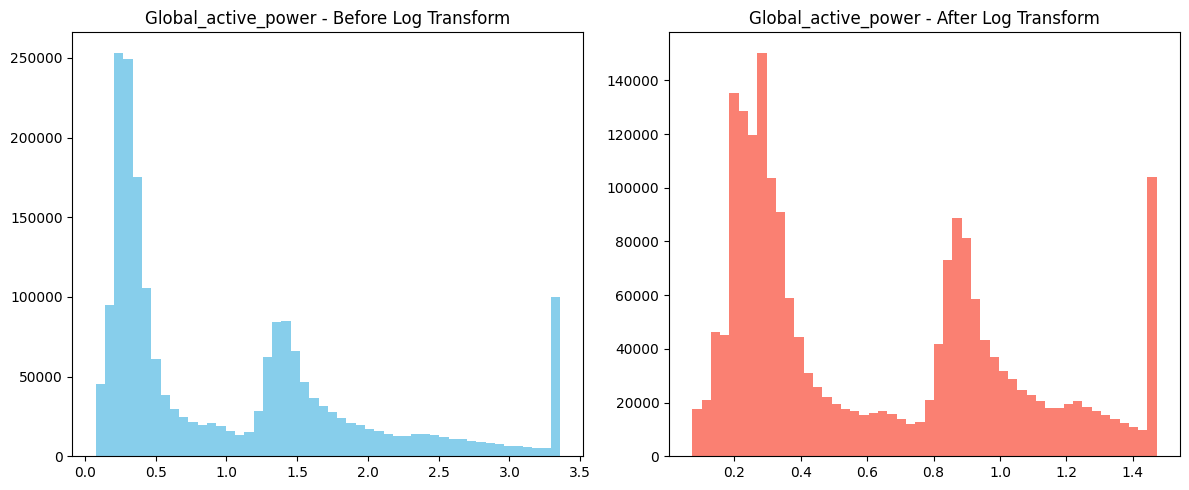

In [4]:
#EDA visualization
import matplotlib.pyplot as plt

col = 'Global_active_power'

plt.figure(figsize=(12,5))

# Before log transform
plt.subplot(1,2,1)
plt.hist(df[col].dropna(), bins=50, color='skyblue')
plt.title(f"{col} - Before Log Transform")

# After log transform
plt.subplot(1,2,2)
plt.hist(df[col+'_log'].dropna(), bins=50, color='salmon')
plt.title(f"{col} - After Log Transform")

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Preprocessing_68/eda_visualizations/log_transform.png',dpi=300, bbox_inches='tight')
plt.show()


In [5]:
output_file = '/content/drive/MyDrive/Preprocessing_68/processed_with_logtransform.csv'
df.to_csv(output_file, index=True)

print("Final dataset with log transforms saved to:", output_file)


Final dataset with log transforms saved to: /content/drive/MyDrive/Preprocessing_68/processed_with_logtransform.csv
